In [1]:
import sys; sys.path.append('/home/clair/wwa'); from wwa import *

## **Synthesis plots**

In [95]:
varnm = "rx30day"

df = {t+"_"+time : pd.read_fwf("synthesis/synth_"+varnm+"_"+t+"_"+time+".txt", comment = "#", header = None, widths = [5,5,12,12,12,12,12,4,99], 
                 names = ["y0", "y1", "est", "lower", "upper", "l_wb", "u_wb", "group", "model"], index_col = "model") for time in ["past", "proj"] for t in ["pr", "di"]}

In [155]:
mdl_list = df["di_past"].index

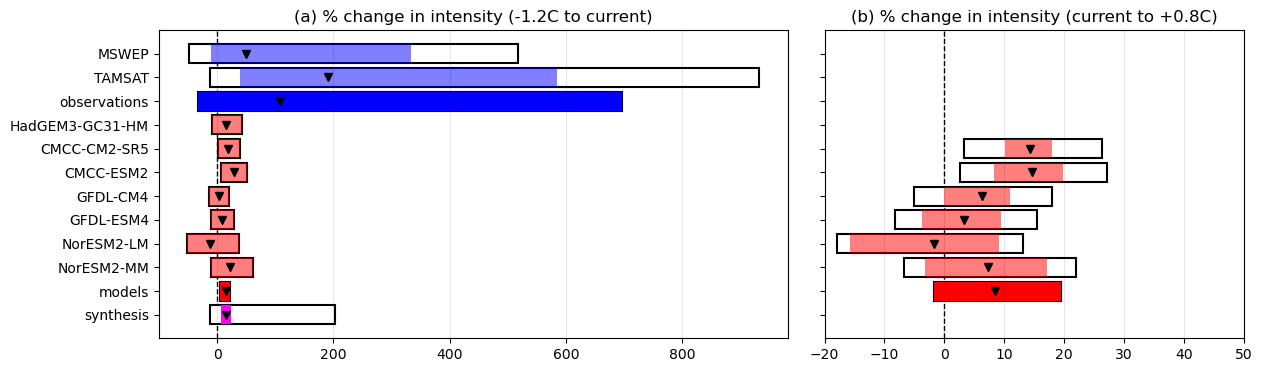

In [159]:
################################################################################################################################################

fig, axs = plt.subplots(ncols = 2, nrows = 1, figsize = (14,4), dpi = 100, sharey = True, gridspec_kw = {"width_ratios" : [1.5,1]})
plt.subplots_adjust(wspace = 0.07, hspace = 0.25)

gcols = ["blue", "blue", "red", "red", "magenta"]
galpha = [0.5,1,0.5,1,1]

for ax in axs: ax.axvline(0, ls = "--", color = "k", lw = 1, zorder = -99)
    
for i in range(2):
    ax = axs[i]
    period = ["past", "proj"][i]
    res = df["di_"+period]
    
    ttl = "("+["a","b"][i]+ ") % change in intensity"+" "+["(-1.2C to current)", "(current to +0.8C)"][i]
    ax.set_title(ttl)
    
    ax.grid(axis = "x", color = "k", alpha = 0.1, ls = "-", zorder = -99)
    
    for m in res.index:
        if m in mdl_list:
            k = list(mdl_list).index(m)
            r = res.loc[m]

            ax.add_patch(Rectangle((r.l_wb,-k-0.4), r.u_wb - r.l_wb, 0.8, edgecolor = "k", facecolor = "w", lw = 1.5))
            ax.add_patch(Rectangle((r.lower,-k-0.4), r.upper - r.lower, 0.8, facecolor = gcols[int(r.group)-1], alpha = galpha[int(r.group)-1]))

            ax.plot(r.est, -k, color = "k", marker = "v")  

axs[0].set_yticks(range(0, -len(mdl_list), -1))
axs[0].set_yticklabels([re.sub('"', '', r.split(" ")[0]).strip() for r in mdl_list])

axs[1].set_xlim(-20,50)

plt.savefig("fig/synthesis-intchange_"+varnm+".png")

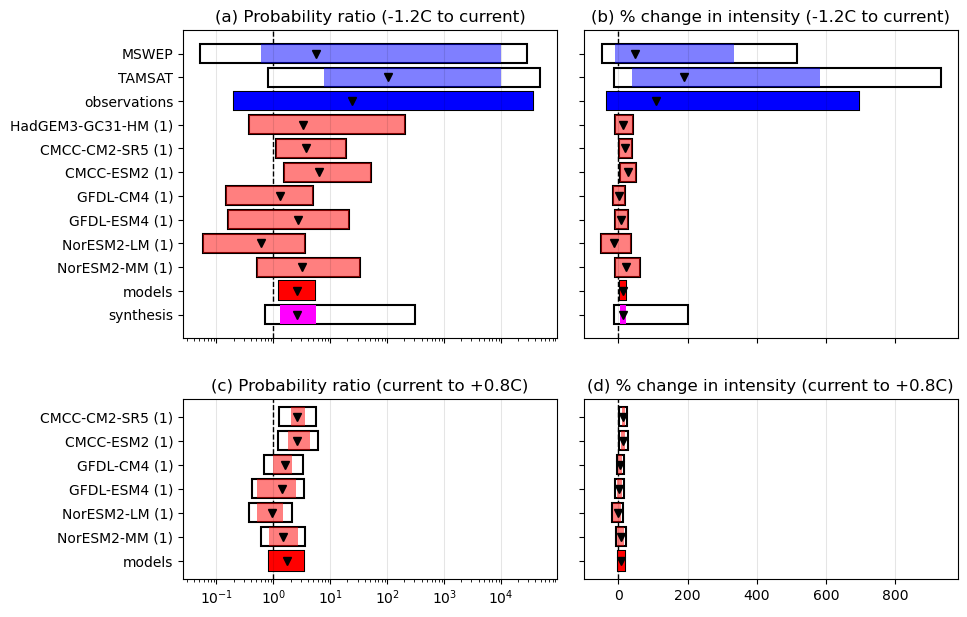

In [96]:
################################################################################################################################################

fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (10,(len(df["di_past"]) + len(df["di_proj"])) * 3/8), dpi = 100,
                        sharey = "row", sharex = "col", gridspec_kw = {"height_ratios" : [len(df["pr_past"]), len(df["pr_proj"])]})
plt.subplots_adjust(wspace = 0.07, hspace = 0.25)

pr_ax = axs[:,0]; di_ax = axs[:,1]

gcols = ["blue", "blue", "red", "red", "magenta"]
galpha = [0.5,1,0.5,1,1]

for ax in pr_ax: ax.axvline(1, ls = "--", color = "k", lw = 1, zorder = -99)
for ax in di_ax: ax.axvline(0, ls = "--", color = "k", lw = 1, zorder = -99)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

for i in range(2):
    for j in range(2):
        
        ax = axs[i,j]
        ds = ["pr", "di"][j]+"_"+["past", "proj"][i]
        res = df[ds]
        ttl = "("+["a","b","c","d"][i*2+j]+ ") "+["Probability ratio", "% change in intensity"][j]+" "+["(-1.2C to current)", "(current to +0.8C)"][i]
        
        ax.set_title(ttl)
        
        ax.grid(axis = "x", color = "k", alpha = 0.1, ls = "-", zorder = -99)
        
        for k in range(len(res)):
            
            r = res.iloc[k]
            ax.add_patch(Rectangle((r.l_wb,-k-0.4), r.u_wb - r.l_wb, 0.8, edgecolor = "k", facecolor = "w", lw = 1.5))
            ax.add_patch(Rectangle((r.lower,-k-0.4), r.upper - r.lower, 0.8, facecolor = gcols[int(r.group)-1], alpha = galpha[int(r.group)-1]))

            ax.plot(r.est, -k, color = "k", marker = "v")  
            
axs[0,0].set_xscale('log') 
# axs[1,0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

axs[0,0].set_yticks(range(0, -len(df["pr_past"]), -1))
axs[0,0].set_yticklabels([re.sub('"', '', r).strip() for r in df["pr_past"].index])

axs[1,0].set_yticks(range(0, -len(df["pr_proj"]), -1))
axs[1,0].set_yticklabels([re.sub('"', '', r).strip() for r in df["pr_proj"].index])

plt.savefig("fig/synthesis_"+varnm+".png")

## **IOD correlations**

In [66]:
iod_mdl = {ds : pd.read_csv("res/res-"+ds+"_iod.csv", index_col = 0).dropna(axis = 0, how = "any") for ds in ["highresmip", "cmip6", "cordex"]}
iod_obs = pd.read_csv("res/res-obs_iod.csv", index_col = 0)

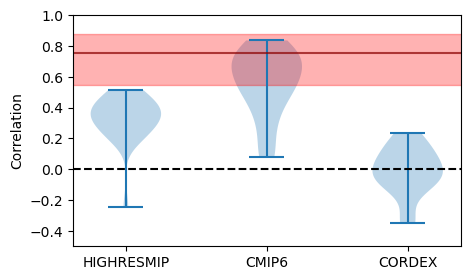

In [94]:
fig, ax = plt.subplots(ncols = 1, figsize = (5,3), dpi = 100)

ax.violinplot([res.iod_rx30d_2023 for res in iod_mdl.values()])
ax.set_xticks([1,2,3])
ax.set_xticklabels([k.upper() for k in iod_mdl.keys()])

ax.set_ylim(-0.5,1)
ax.set_ylabel("Correlation")

ax.axhline(0, color = "k", ls = "--")
ax.axhline(iod_obs.est.mean(), color = "darkred", alpha = 0.7)

ax.add_patch(Rectangle((0, iod_obs["2.5%"].min()), 4, iod_obs["97.5%"].max() - iod_obs["2.5%"].min(), color = "red", alpha = 0.3))

In [79]:
?Rectangle

Init signature: Rectangle(xy, width, height, *, angle=0.0, rotation_point='xy', **kwargs)
Docstring:     
A rectangle defined via an anchor point *xy* and its *width* and *height*.

The rectangle extends from ``xy[0]`` to ``xy[0] + width`` in x-direction
and from ``xy[1]`` to ``xy[1] + height`` in y-direction. ::

  :                +------------------+
  :                |                  |
  :              height               |
  :                |                  |
  :               (xy)---- width -----+

One may picture *xy* as the bottom left corner, but which corner *xy* is
actually depends on the direction of the axis and the sign of *width*
and *height*; e.g. *xy* would be the bottom right corner if the x-axis
was inverted or if *width* was negative.
Init docstring:
Parameters
----------
xy : (float, float)
    The anchor point.
width : float
    Rectangle width.
height : float
    Rectangle height.
angle : float, default: 0
    Rotation in degrees anti-clockwise about the r